# TODO
- <span style="color:red;">split fit and transform in DataFramePreprocessor</span>

# Preface


In [28]:
# IMPORTS
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score

# DATA IMPORT
dt_golf = pd.read_csv("../data/golf.csv", sep=";")
dt_golf_test = pd.read_csv("../data/golf-testset.csv", sep=";")

---
# Task 3.1: Golf Dataset – Decision Tree
Learn a decision tree from the Golf dataset (Operator: Decision Tree). Use this tree to classify the examples in the Golf-Testset, which is also delivered together with RapidMiner (Operator: Apply Model). For how many objects does the trained tree predict the correct value?

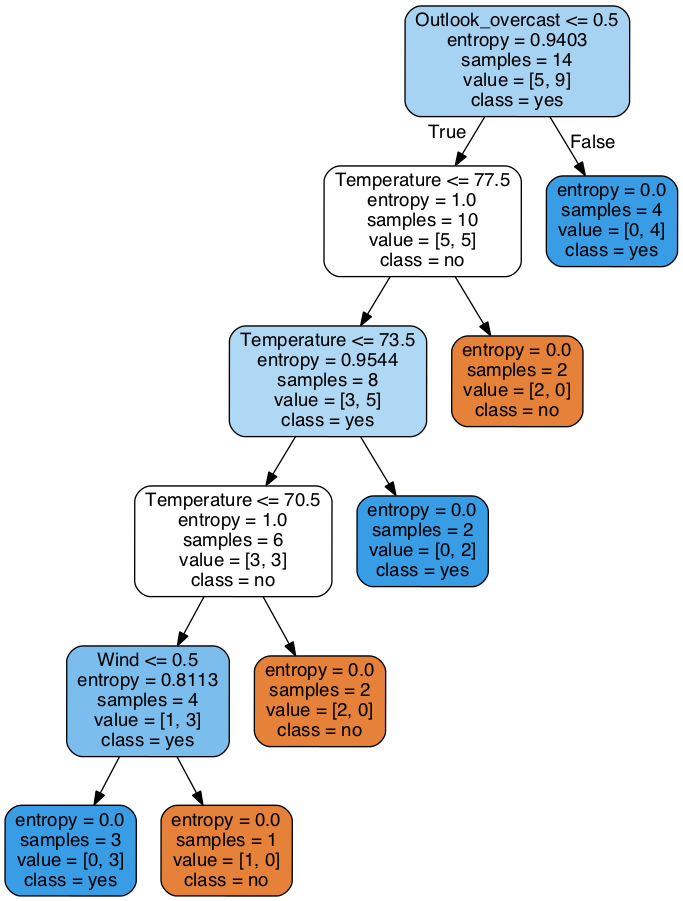

In [50]:
# Initiate preprocessor and transform data
dfp = DataFramePreprocessor()
X, y = dfp.fit_transform(dt_golf, "Play")

# Initiate and learn DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X,y)

# Plot the decision tree
plot_decision_tree(X, y, dtree, path="../figures/classification/tree-golf.dot")

In [7]:
# Test the decision tree on the unseen data
X_test, y_test = dfp.fit_transform(dt_golf_test, "Play")
y_pred = pd.DataFrame(dtree.predict(X_test),
                      index = y_test.index,
                      columns = ["{}_pred".format(y_test.columns[0])]
                     )

# Evaluate the decision tree
np.sum(y_test.values == y_pred.values)

7

The Decision Tree predictes correctly in 7 cases.

---
# Task 3.2: Golf Dataset – Evaluation
Evaluate the performance of your model by adding a Performance (Classification) operator to your process. Examine the confusion matrix. What is the accuracy of your classifier?

<module 'matplotlib.pyplot' from '/Users/joshuagorner/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

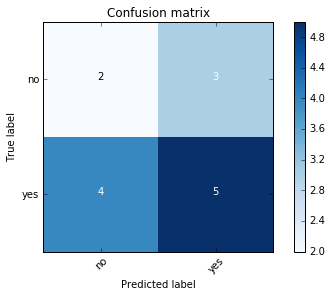

In [8]:
# Create and visualize the confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, dfp.label_encoder.classes_)

In [9]:
# Evaluate the accuracy score
accuracy_score(y_test, y_pred)

0.5

The accuracy score is 50% (7 out of 14), hence the Decision Tree is not better than random guessing.

---
# Task 3.3: Golf Dataset – k-NN
Does a k-Nearest-Neighbor (k-NN) classifier work better for this task? To find out, replace the Decision Tree operator with a k-NN operator and evaluate the trained model using different values for k. What is the best accuracy you can reach?

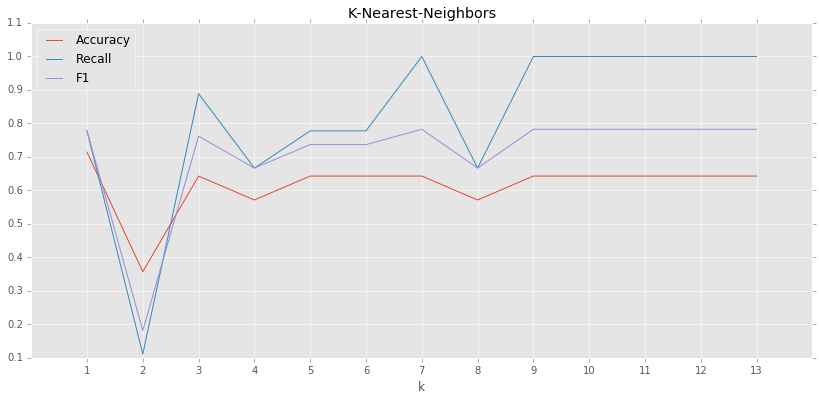

In [30]:
# Settings for parameter tuning
k_limits = [1, 14]
k_results_acc = np.zeros(k_limits[1]-k_limits[0])
k_results_rec = np.zeros(k_limits[1]-k_limits[0])
k_results_f1 = np.zeros(k_limits[1]-k_limits[0])

# Parameter evaluation based on accuracy, recall and F1
for idx, k in enumerate(np.arange(k_limits[0], k_limits[1])):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y.values.ravel())
    y_pred = knn.predict(X_test)
    k_results_acc[idx] = accuracy_score(y_test, y_pred)
    k_results_rec[idx] = recall_score(y_test, y_pred)
    k_results_f1[idx] = f1_score(y_test, y_pred)

# Plot parameter evaluation
plt.rcParams["figure.figsize"] = [14, 6]
plt.plot(np.arange(k_limits[0], k_limits[1]), k_results_acc, label="Accuracy")
plt.plot(np.arange(k_limits[0], k_limits[1]), k_results_rec, label="Recall")
plt.plot(np.arange(k_limits[0], k_limits[1]), k_results_f1, label="F1")
plt.title("K-Nearest-Neighbors")
plt.xlabel("k")
plt.xticks(np.arange(1,14))
plt.yticks(np.arange(0.1,1.2, 0.1))
plt.legend(loc="best")
plt.savefig("../figures/classification/golf-knn-parameter-tuning.png")
plt.show()

The highest achievable accuracy result is ~71.43% for `k=1` neighbors.

---
# Task 3.4 Iris Flowers – ID3
Set up the process as described above. What accuracy can you reach using the ID3 decision tree?

---
# Task 3.5: Iris Flowers – Decision Tree
What accuracy can be reached using this kind of decision tree algorithm?
Compare the different trained models (trees). In case you would need to
interpret the model as human, which model would you use and why? (Hint:
Keep in mind Occam’s Razor.)

---
# Task 3.6: Credit Dataset – ROC
Apply the Compare ROCs operator to the dataset and include k-NN (with different values for k), Decision Tree, Naive Bayes and Rule Induction. Which classification approach looks most promising to you?

---
# Task 3.7: Credit Dataset – X-Validation
What accuracy levels can you reach by using a 10-fold x-validation?

---
# Task 3.8: Credit Dataset – Balancing
How does the change influence the accuracy and the number of falsely classified bad customers?

---
# Task 3.9: Credit Dataset – Cost-specific Performance
Set up the cost matrix of the Performance (Cost) operator by assuming that you will lose 1 unit if you refuse a credit to a good customer, but that you lose 100 units if you give a bad customer a credit. Rerun the setup with the different classification algorithms and x-validation. Find the best setup for this cost assumption. (Hint: The best results will have the lowest misclassification costs.)

---
# Task 3.10: Credit Dataset – Noise
Is your preferred classification approach still feasible for this situation? How does the performance of the other classifiers evolve?